## Finance Data Project

In [ ]:
#Libraries
import io
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#setting the style of the plots
sns.set_style('whitegrid')
#ignoring warnings
warnings.filterwarnings('ignore')

Fetching all_banks file from local Directory

In [ ]:
uploads = files.upload()

Saving all_banks to all_banks (1)


In [ ]:
#Reading the data through pd.read_pickle()
banks_stock = pd.read_pickle(io.BytesIO(uploads['all_banks']))

In [ ]:
banks_stock.head(3)

Bank Ticker    BAC                       ...    WFC                        
Stock Info    Open   High    Low  Close  ...   High    Low  Close    Volume
Date                                     ...                               
2006-01-03   46.92  47.18  46.15  47.08  ...  31.98  31.20  31.90  11016400
2006-01-04   47.00  47.24  46.45  46.58  ...  31.82  31.36  31.53  10871000
2006-01-05   46.58  46.83  46.32  46.64  ...  31.56  31.31  31.50  10158000

[3 rows x 30 columns]

In [ ]:
banks_stock.columns.names

FrozenList(['Bank Ticker', 'Stock Info'])

In [ ]:
Banks_in_dataset = list(set(i[0] for i in banks_stock.columns))
Banks_in_dataset.sort()
Banks_in_dataset

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [ ]:
banks_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

So the Dataset is free from null values. So the Data is clean and ready for analysis.

### Exploratory Data Analysis
What is the max Close price for each bank's stock throughout the time period?

In [ ]:
banks_stock.xs('Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Creating a Returns DataFrame

** Stock Returns for Each Banks**

$$r_t = \frac{p_t - p_{0}}{p_{0}} = \frac{p_t}{p_{0}} - 1$$

>Where;
<br> ${p_t}$ = Initial Stock Price
<br> ${p_{0}}$ = Closing Price

In [ ]:
Returns = pd.DataFrame()
Returns

""


In [ ]:
#Mapping data into the Returns DataFrame
for i in Banks_in_dataset:
    Returns[i + " Returns"] = banks_stock[i]['Close'].pct_change()
Returns.head(3)    

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951


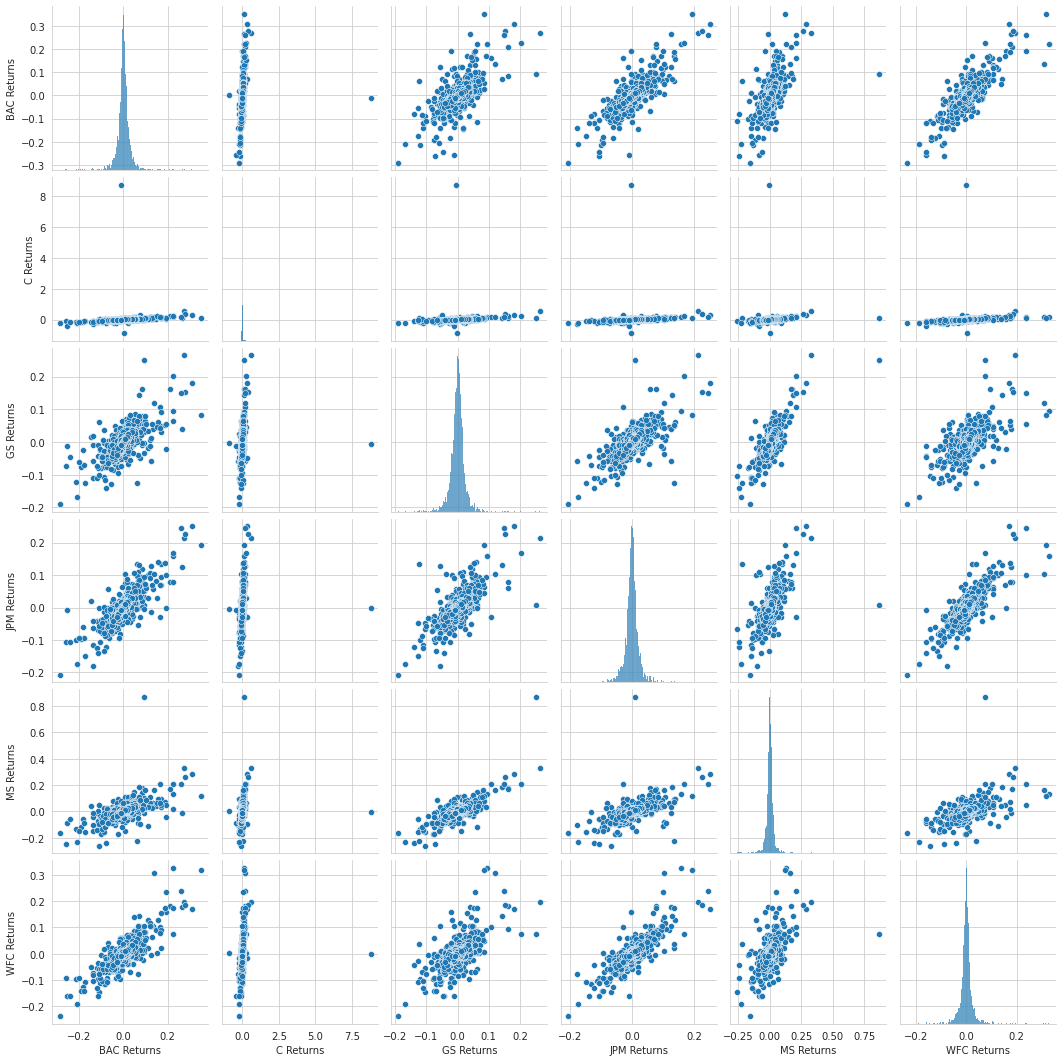

In [ ]:
sns.pairplot(Returns.iloc[1:])

To better understand the above plots, We will be making plot for each Banks separately.

In [ ]:
Returns['Year'] = Returns.index.map(lambda ind: ind.year)
returns_per_year = Returns.groupby('Year').sum()

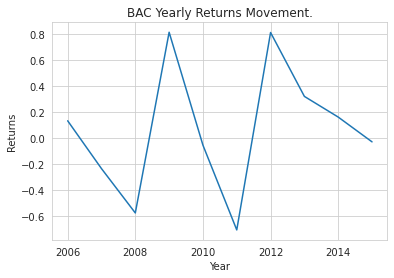

In [ ]:
returns_per_year['BAC Returns'].plot()
plt.title('BAC Yearly Returns Movement.')
plt.ylabel('Returns')
plt.show()

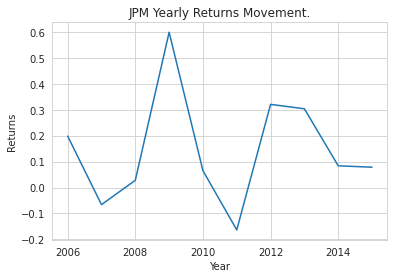

In [ ]:
returns_per_year['JPM Returns'].plot()
plt.title('JPM Yearly Returns Movement.')
plt.ylabel('Returns')
plt.show()

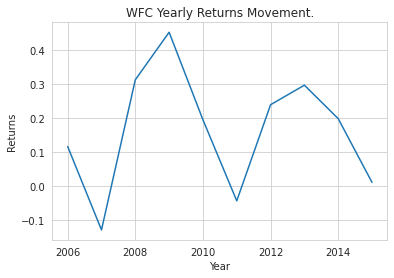

In [ ]:
returns_per_year['WFC Returns'].plot()
plt.title('WFC Yearly Returns Movement.')
plt.ylabel('Returns')
plt.show()

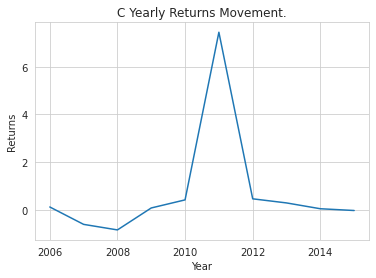

In [ ]:
returns_per_year['C Returns'].plot()
plt.title('C Yearly Returns Movement.')
plt.ylabel('Returns')
plt.show()

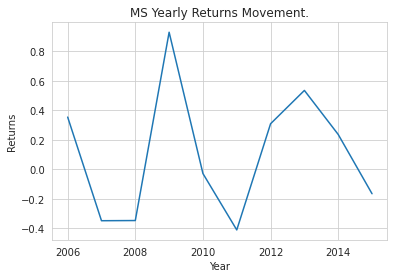

In [ ]:
returns_per_year['MS Returns'].plot()
plt.title('MS Yearly Returns Movement.')
plt.ylabel('Returns')
plt.show()

We can now look at the plots and make inference from it. One major inference to be made is the movement of returns. 

* BAC got to its peak twice and has a steady decline and increase but since 2014 to 2015, there is a shift from the normal movement of their returns.

More inference can be made for all the Banks, but the Plot is explicit to any Investment Banker or Analyst.

The Banks Worst day of returns.

In [ ]:
#To remove the Year column which i used for further analysis on the returns value.
return_ = Returns.drop('Year', axis = 1)
#Worst day returns
return_.idxmin()

BAC Returns   2009-01-20
C Returns     2011-05-06
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

Best day of return.


In [ ]:
#Best day returns
return_.idxmax()

BAC Returns   2009-04-09
C Returns     2011-05-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

Riskiest Stock over the entire time.

In [ ]:
return_.std()
#Here CitiBank is the riskiest.

BAC Returns    0.036650
C Returns      0.179969
GS Returns     0.025346
JPM Returns    0.027656
MS Returns     0.037820
WFC Returns    0.030233
dtype: float64

Riskiest Stock for 2015

In [ ]:
_2015return = Returns[Returns['Year'] == 2015]
_2015return.drop('Year', axis = 1, inplace = True)
_2015return.std()
#Here the Riskiest is Bank of America and Morgan Stanley.

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

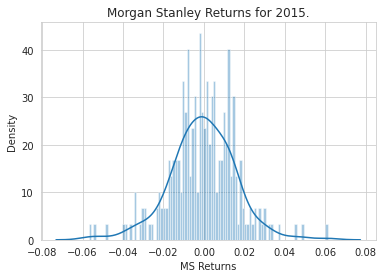

In [ ]:
#Create a distplot using seaborn of the 2015 returns for Morgan Stanley 
sns.distplot(a = _2015return['MS Returns'], bins = 100)
plt.title('Morgan Stanley Returns for 2015.')
plt.show()

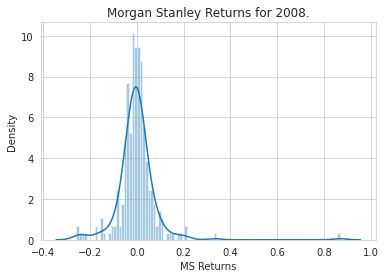

In [ ]:
#Create a distplot using seaborn of the 2008 returns for CitiGroup
_2008return = Returns[Returns['Year'] == 2008]
sns.distplot(a = _2008return['MS Returns'], bins = 100)
plt.title('Morgan Stanley Returns for 2008.')
plt.show()

Creating a Plot to Show the Closing price for the entire time range.

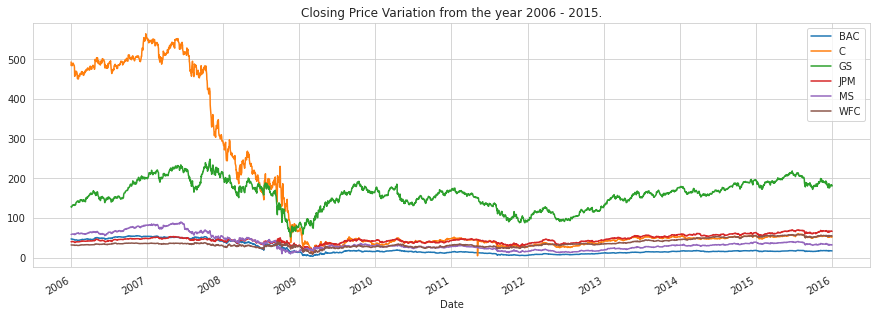

In [ ]:
for i in Banks_in_dataset:
  banks_stock[i]['Close'].plot(figsize = (15, 5), label = i)

plt.title('Closing Price Variation from the year 2006 - 2015.')
plt.legend()
plt.show()